<a href="https://colab.research.google.com/github/hanizarchmn/MLR-Multiple-Linear-Regression-/blob/main/Multiple_Linear_Regression_(Pie_Sales_Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   Nama  = Hanizar Rachman
*   NIP   = DS0113
*   Kelas = Data Science

---







# **Multiple Linear Regression**

Merupakan teknik statistik yang menggunakan beberapa variabel bebas (independent) untuk memprediksi hasil dari variabel terikat (dependent)

Kesempatan kali ini kita akan menganalisis penjualan pie.

Library yang digunakan pada MLR diantaranya:


1.   Pandas
2.   Numpy
3.   Matplotlib
4.   Sklearn
5.   Statsmodels
6.   Seaborn


In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn import linear_model

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_pie = pd.read_csv('https://raw.githubusercontent.com/rc-dbe/dti/main/data/pie-sales.csv', sep =";")
df_pie

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0
5,6,380,7.5,4.0
6,7,430,4.5,3.0
7,8,470,6.4,3.7
8,9,450,7.0,3.5
9,10,490,5.0,4.0


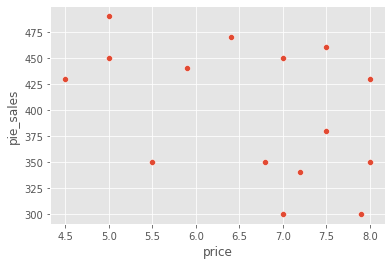

In [4]:
# Memvisualisasi data menggunakan scatterplot
sns.scatterplot(x="price", y="pie_sales", data= df_pie)

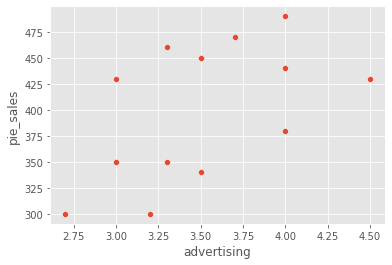

In [5]:
# Memvisualisasi data menggunakan scatterplot
sns.scatterplot(x="advertising", y="pie_sales", data= df_pie)

# Regression using Sklearn

In [20]:
X = df_pie[['price', 'advertising']]
Y = df_pie['pie_sales']

x_surf, y_surf = np.meshgrid(np.linspace(df_pie.price.min(), df_pie.price.max(), 100), np.linspace(df_pie.advertising.min(),df_pie.advertising.max(),100))
X_value = pd.DataFrame({'price' : x_surf.ravel(), 'advertising' : y_surf.ravel()})

In [21]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
print('Intercept : \n', regr.intercept_)
print('Coefficient : \n', regr.coef_)

Intercept : 
 306.5261932837436
Coefficient : 
 [-24.97508952  74.13095749]


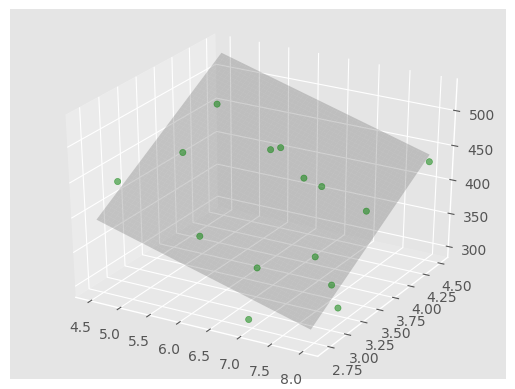

In [30]:
plt.style.use('default')
plt.style.use('ggplot')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

fit = regr.predict(X_value)
fit = np.array(fit)

ax.scatter(df_pie['price'], df_pie['advertising'], df_pie['pie_sales'],c='green', marker='o', alpha=0.5)
ax.plot_surface(x_surf, y_surf, fit.reshape(x_surf.shape), color='grey', alpha=0.3)

In [37]:
new_price = 4.0
new_advertising = 9.1
print('Prediksi penjualan pie tiap minggunya : \n', regr.predict([[new_price, new_advertising]]))

Prediksi penjualan pie tiap minggunya : 
 [881.21754836]


In [38]:
new_price = 5.0
new_advertising = 3.5
print('Prediksi penjualan pie tiap minggunya : \n', regr.predict([[new_price, new_advertising]]))

Prediksi penjualan pie tiap minggunya : 
 [441.10909691]


In [39]:
new_price = 5.0
new_advertising = 10.1
print('Prediksi penjualan pie tiap minggunya : \n', regr.predict([[new_price, new_advertising]]))

Prediksi penjualan pie tiap minggunya : 
 [930.37341633]


# Regression using Statsmodels

In [41]:
X = sm.add_constant(X)

In [40]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:              pie_sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              361.5
Date:                Sat, 24 Oct 2020   Prob (F-statistic):                    4.04e-12
Time:                        06:21:25   Log-Likelihood:                         -81.034
No. Observations:                  15   AIC:                                      166.1
Df Residuals:                      13   BIC:                                      167.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------